The data has been split into two groups:

training set (train.csv) test set (test.csv) The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

The ASK
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)
plt.rcParams['figure.figsize']=[10,8]

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [3]:
df_titanic = pd.concat([train,test], ignore_index=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<Axes: >

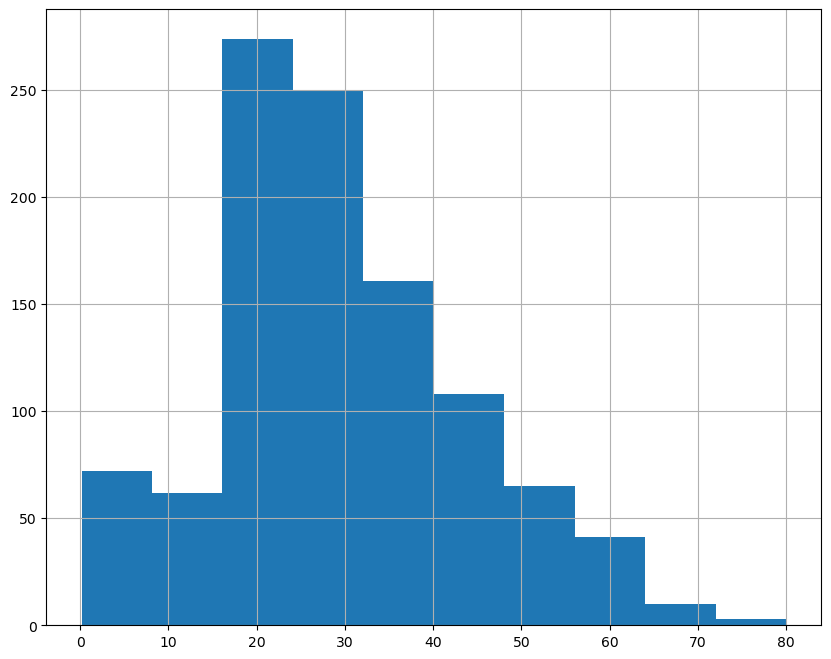

In [4]:
df_titanic['Age'].hist()

<Axes: >

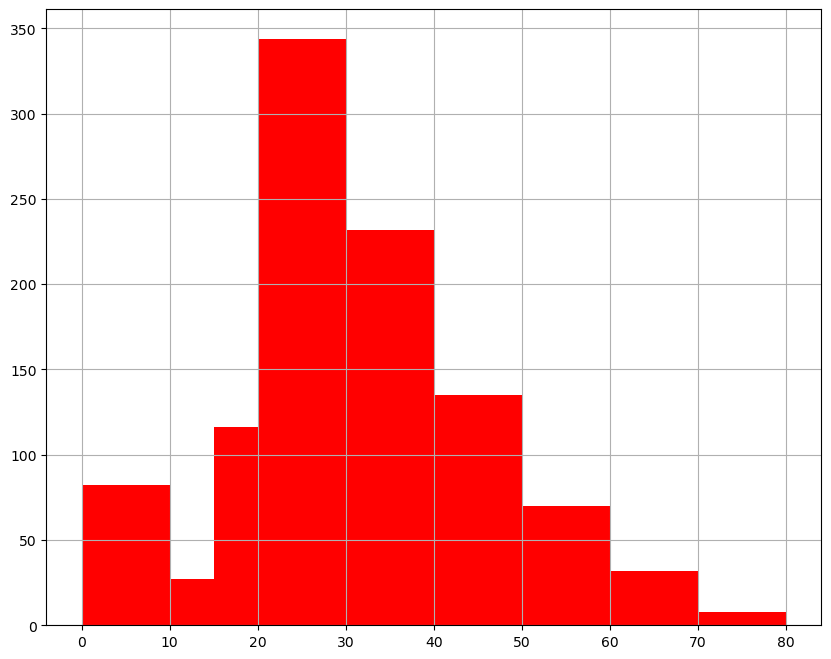

In [5]:
df_titanic['Age'].hist(bins=[0,10,15,20,30,40,50,60,70,80],color='red')

In [6]:
print('skewness is', df_titanic['Age'].skew())
print('kurtosis is', df_titanic['Age'].kurtosis())

skewness is 0.40767455974362266
kurtosis is 0.1469476357378139


<Axes: >

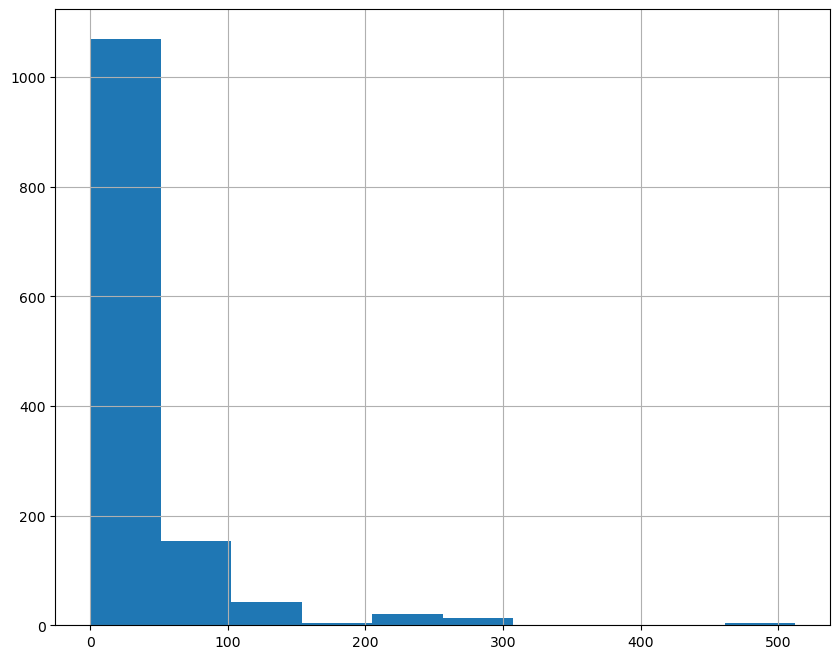

In [7]:
df_titanic['Fare'].hist()

In [8]:
print('skewness is', df_titanic['Fare'].skew())
print('kurtosis is', df_titanic['Fare'].kurtosis())

skewness is 4.367709134122922
kurtosis is 27.027986349442294


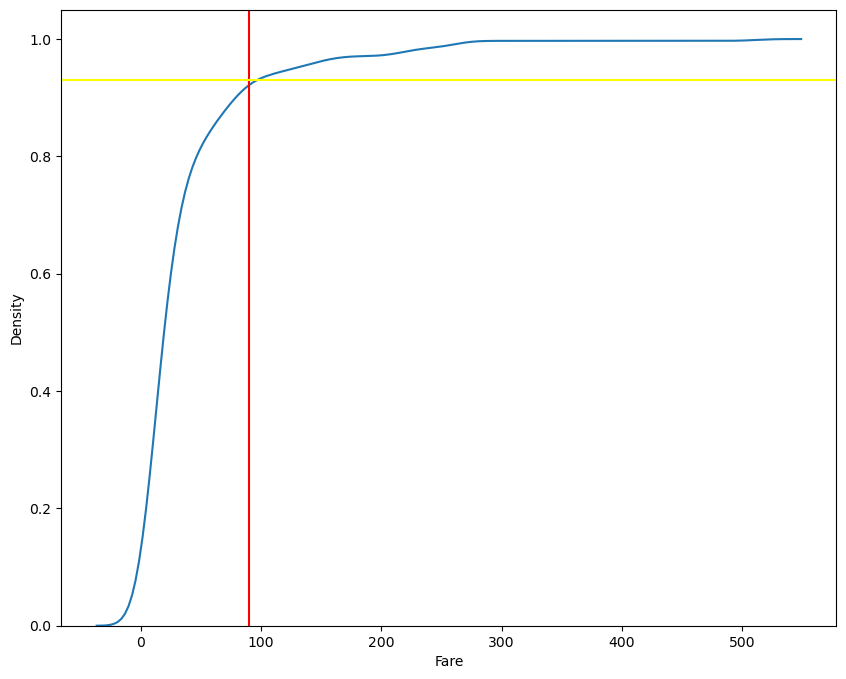

In [9]:
sns.kdeplot(x='Fare', data=df_titanic, cumulative=True)
plt.axvline(90, color='red')
plt.axhline(0.93, color='yellow')

In [10]:
df_titanic['Fare'][df_titanic['Fare']==0].count()

17

In [11]:
num_cols=df_titanic.select_dtypes(include=np.number)
num_cols.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [12]:
num_cols = num_cols[['Age','Fare']]

In [13]:
plt.rcParams['figure.figsize']=10,10

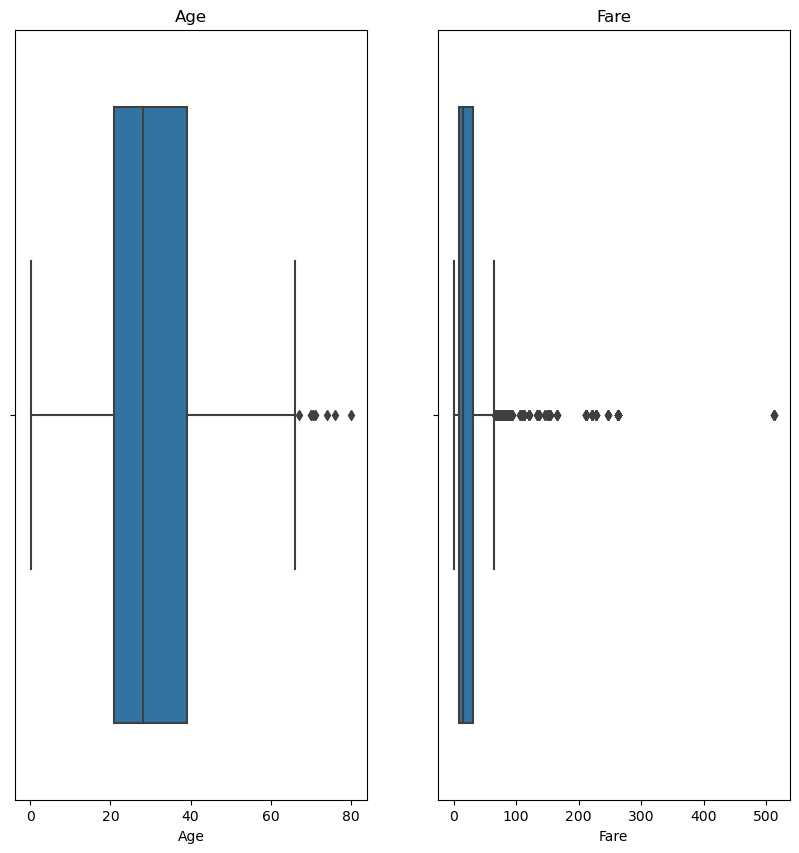

In [14]:
j=1
for i in num_cols:
    plt.subplot(1,2,j)
    sns.boxplot(x=df_titanic.loc[:,i])
    plt.title(i)
    j=j+1

In [15]:
cols = ['Embarked','Survived','Sex']
for i in cols:
    df_titanic[i]=df_titanic[i].astype(object)

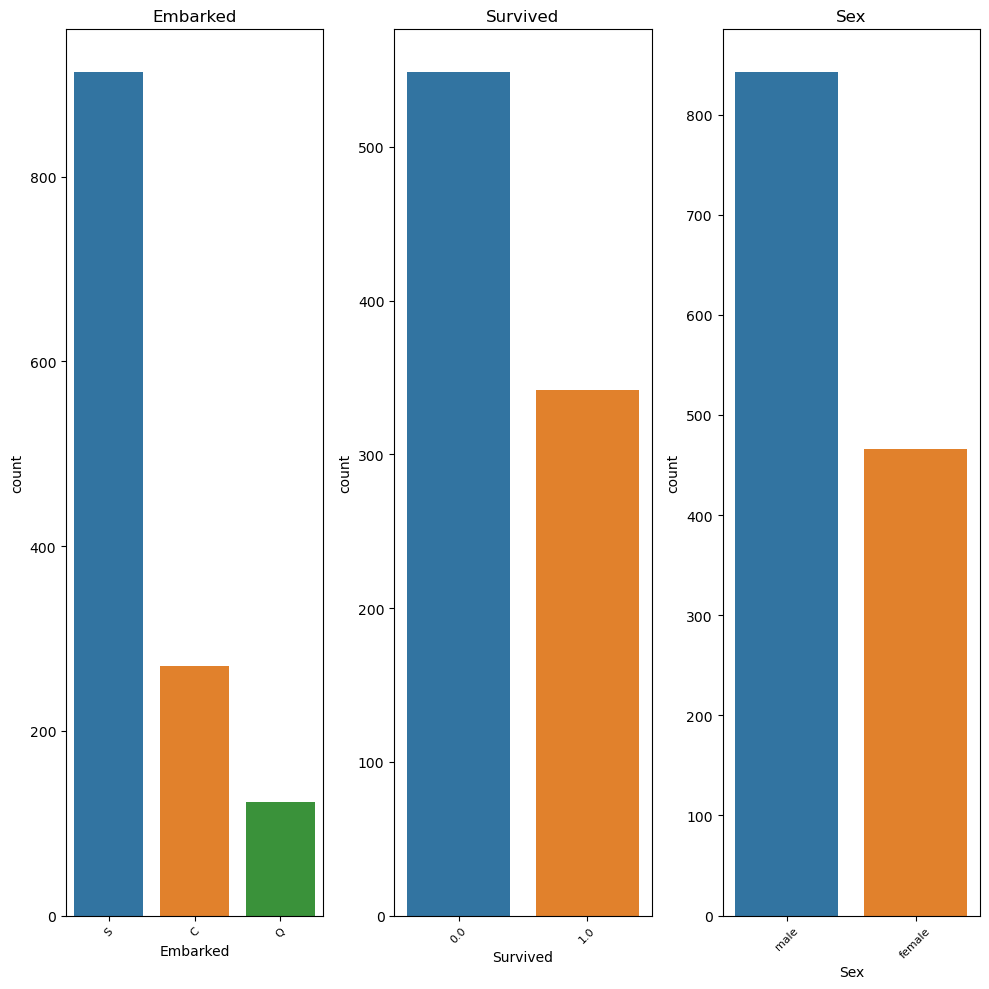

In [16]:
j=1
for i in cols:
    plt.subplot(1,3,j)
    sns.countplot(x=df_titanic.loc[:,i])
    plt.title(i)
    j=j+1
    
    plt.xticks(rotation=45, fontsize=8)
    
plt.tight_layout()
plt.show()

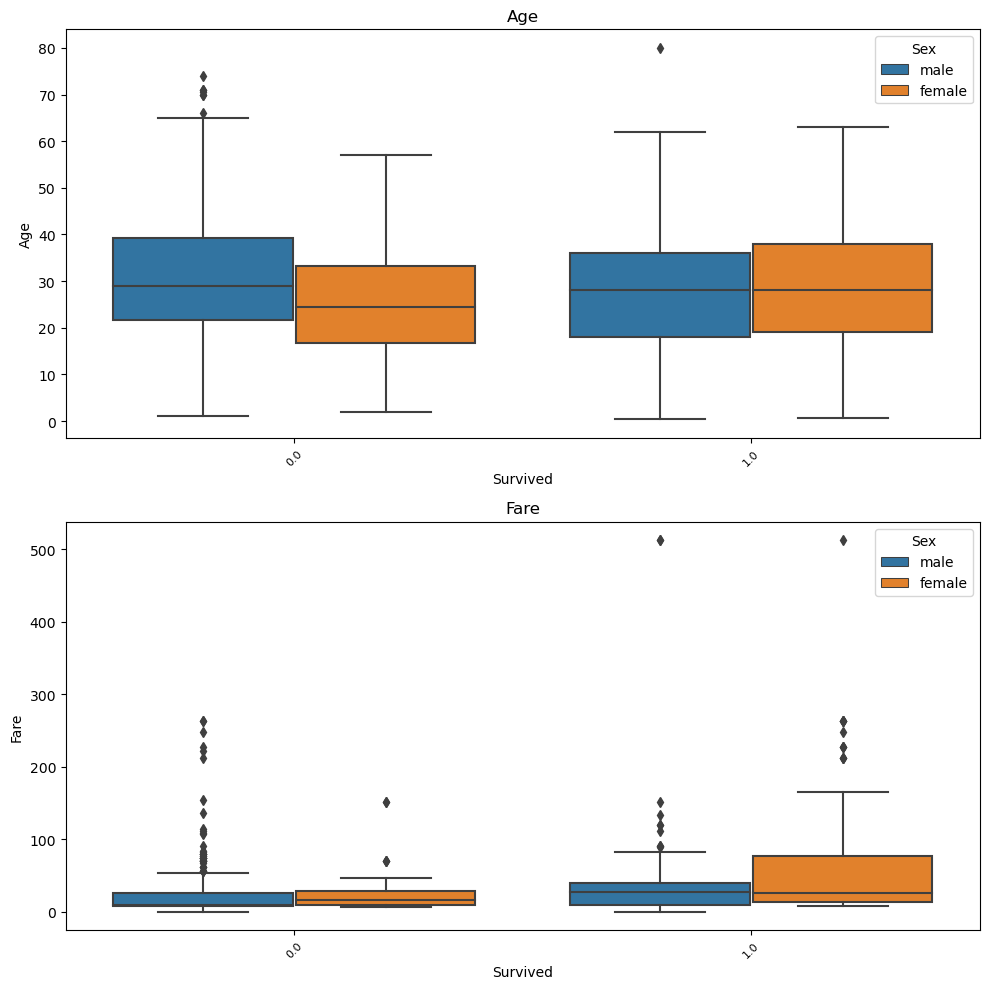

In [17]:
j=1
for i in num_cols:
    plt.subplot(2,1,j)
    sns.boxplot(x=df_titanic['Survived'], y=df_titanic.loc[:,i], hue=df_titanic['Sex'])
    plt.title(i)
    j=j+1
    
    plt.xticks(rotation=45, fontsize=8)
    
plt.tight_layout()
plt.show()

In [18]:
df_titanic.groupby('Survived')['Fare'].describe()

count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0.0       549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1.0       342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

In [19]:
df_titanic.groupby('Survived')['Pclass'].value_counts(normalize=True)*100

Survived  Pclass
0.0       3         67.759563
          2         17.668488
          1         14.571949
1.0       1         39.766082
          3         34.795322
          2         25.438596
Name: Pclass, dtype: float64

### Use of Plotly to visualize Histogram with respect to Categorical variable

In [20]:
import plotly.express as px

In [21]:
px.histogram(df_titanic, x='Age', color='Embarked')

In [22]:
pd.crosstab(index=df_titanic['Embarked'], columns=df_titanic['Sex'], values=df_titanic['Fare'], aggfunc=np.mean)

Sex          female       male
Embarked                      
C         81.128540  48.810619
Q         12.550837  12.273941
S         39.339305  21.841878

In [23]:
pd.crosstab(index=df_titanic['Pclass'], columns=df_titanic['Sex'], values=df_titanic['Fare'], aggfunc=np.mean)

Sex         female       male
Pclass                       
1       109.412385  69.888385
2        23.234827  19.904946
3        15.324250  12.415462

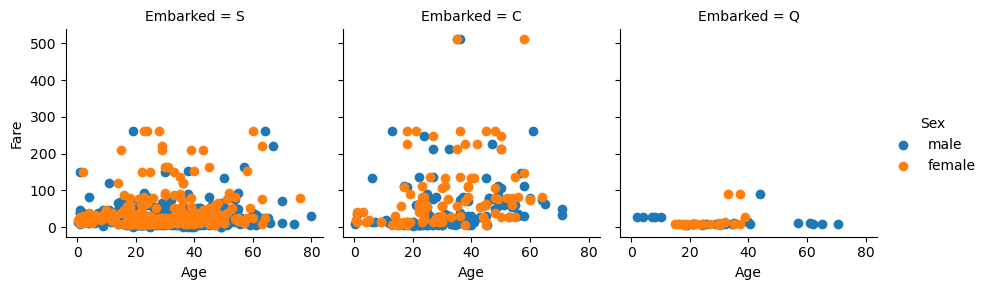

In [24]:
titanicplot = sns.FacetGrid(df_titanic, col='Embarked', hue='Sex')
titanicplot.map(plt.scatter, 'Age', 'Fare').add_legend()
plt.show()

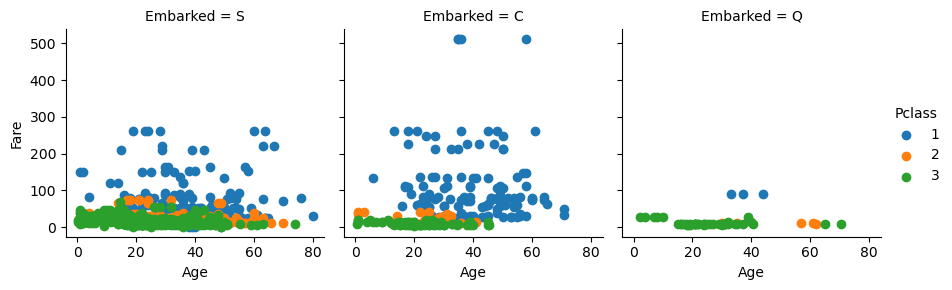

In [25]:
titanicplot = sns.FacetGrid(df_titanic, col='Embarked', hue='Pclass')
titanicplot.map(plt.scatter, 'Age', 'Fare').add_legend()
plt.show()

### Missing values

In [26]:
((df_titanic.isnull().sum()/df_titanic.index.size)*100).sort_values(ascending=False)

Cabin          77.463713
Survived       31.932773
Age            20.091673
Embarked        0.152788
Fare            0.076394
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
dtype: float64

In [27]:
pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [28]:
df_titanic.groupby('Sex')['Age'].describe()

count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  388.0  28.687088  14.576962  0.17  19.0  27.0  38.0  76.0
male    658.0  30.585228  14.280581  0.33  21.0  28.0  39.0  80.0

In [29]:
from fancyimpute import KNN, IterativeImputer
from sklearn.preprocessing import StandardScaler

In [30]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [31]:
num_cols = df_titanic.select_dtypes(np.number)
num_cols = num_cols[['Age', 'Fare']]

In [32]:
sc = StandardScaler()
df_num_sc = pd.DataFrame(sc.fit_transform(num_cols), columns=num_cols.columns)
df_num_sc.head()

Age      Fare
0 -0.547050 -0.503402
1  0.563552  0.734222
2 -0.269400 -0.490356
3  0.355314  0.382778
4  0.355314 -0.487940

In [33]:
from sklearn.impute import KNNImputer  # in Knn imputation, values are filled by taking multiple columns into consideration
imputer = KNNImputer(n_neighbors=5)

df_num_sc['Age'] = imputer.fit_transform(pd.DataFrame(df_num_sc['Age']))

df_num_sc['Fare'] = imputer.fit_transform(pd.DataFrame(df_num_sc['Fare']))

In [34]:
# Using Inverse_transform method
df_num = pd.DataFrame(sc.inverse_transform(df_num_sc), columns=df_num_sc.columns)
df_num.head()

Age     Fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500

In [35]:
df_others = df_titanic[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked']]

df_titanic = pd.concat([df_num,df_others],axis=1)

In [36]:
df_titanic.isnull().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          2
dtype: int64

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_titanic['Embarked'] = imp.fit_transform(pd.DataFrame(df_titanic['Embarked']))

In [39]:
df_titanic.isnull().sum()

Age               0
Fare              0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Cabin          1014
Embarked          0
dtype: int64

In [40]:
df_titanic.groupby('Pclass')['Cabin'].describe()

count unique          top freq
Pclass                               
1        256    168  C23 C25 C27    6
2         23      9          F33    4
3         16      9           G6    5

In [41]:
pd.crosstab(df_titanic['Pclass'], df_titanic['Cabin'])

Cabin   A10  A11  A14  A16  A18  A19  A20  A21  A23  A24  A26  A29  A31  A32  \
Pclass                                                                         
1         1    1    1    1    1    1    1    1    1    1    1    1    1    1   
2         0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3         0    0    0    0    0    0    0    0    0    0    0    0    0    0   

Cabin   A34  A36  A5  A6  A7  A9  B10  B101  B102  B11  B18  ...  E44  E45  \
Pclass                                                       ...             
1         3    1   1   1   1   1    1     1     1    1    2  ...    2    1   
2         0    0   0   0   0   0    0     0     0    0    0  ...    0    0   
3         0    0   0   0   0   0    0     0     0    0    0  ...    0    0   

Cabin   E46  E49  E50  E52  E58  E60  E63  E67  E68  E77  E8  F  F E46  F E57  \
Pclass                                                                          
1         2    1    2    1    1    1    1    2    1    0   2  0      0      0   
2         0    0    0    0    0    0    0    0    0    1   0  1      0      0   
3         0    0    0    0    0    0    0    0    0    0   0  0      1      1   

Cabin   F E69  F G63  F G73  F2  F33  F38  F4  G6  T  
Pclass                                                
1           0      0      0   0    0    0   0   0  1  
2           0      0      0   4    4    0   4   0  0  
3           1      2      2   0    0    1   0   5  0  

[3 rows x 186 columns]

In [42]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [43]:
df_titanic.groupby('Pclass')['Ticket'].describe()

count unique           top freq
Pclass                                
1        323    188      PC 17608    7
2        277    192  S.O.C. 14879    7
3        709    549      CA. 2343   11

In [44]:
df_g1 = df_titanic.groupby('Pclass')
df_g1.get_group(1).describe()

Age        Fare  PassengerId  Pclass       SibSp       Parch
count  323.000000  323.000000    323.00000   323.0  323.000000  323.000000
mean    38.039580   87.508992    672.49226     1.0    0.436533    0.365325
std     13.970676   80.447178    368.72570     0.0    0.609064    0.715602
min      0.920000    0.000000      2.00000     1.0    0.000000    0.000000
25%     29.881138   30.695800    347.00000     1.0    0.000000    0.000000
50%     36.000000   60.000000    670.00000     1.0    0.000000    0.000000
75%     48.000000  107.662500    973.50000     1.0    1.000000    0.500000
max     80.000000  512.329200   1306.00000     1.0    3.000000    4.000000

In [45]:
df_g1.get_group(2).describe()

Age        Fare  PassengerId  Pclass       SibSp       Parch
count  277.000000  277.000000   277.000000   277.0  277.000000  277.000000
mean    29.528333   21.179196   671.566787     2.0    0.393502    0.368231
std     13.237693   13.607122   383.707495     0.0    0.590100    0.692717
min      0.670000    0.000000    10.000000     2.0    0.000000    0.000000
25%     23.000000   13.000000   341.000000     2.0    0.000000    0.000000
50%     29.000000   15.045800   671.000000     2.0    0.000000    0.000000
75%     36.000000   26.000000  1035.000000     2.0    1.000000    1.000000
max     70.000000   73.500000  1298.000000     2.0    3.000000    3.000000

In [46]:
df_g1.get_group(3).describe()

Age        Fare  PassengerId  Pclass       SibSp       Parch
count  709.000000  709.000000   709.000000   709.0  709.000000  709.000000
mean    26.302224   13.331087   640.558533     3.0    0.568406    0.400564
std     10.310818   11.510752   379.887782     0.0    1.299681    0.981639
min      0.170000    0.000000     1.000000     3.0    0.000000    0.000000
25%     21.000000    7.750000   302.000000     3.0    0.000000    0.000000
50%     29.881138    8.050000   644.000000     3.0    0.000000    0.000000
75%     29.881138   15.245800   971.000000     3.0    1.000000    0.000000
max     74.000000   69.550000  1309.000000     3.0    8.000000    9.000000

In [47]:
df_g1.get_group(1)

Age      Fare  PassengerId Survived  Pclass  \
1     38.0   71.2833            2      1.0       1   
3     35.0   53.1000            4      1.0       1   
6     54.0   51.8625            7      0.0       1   
11    58.0   26.5500           12      1.0       1   
23    28.0   35.5000           24      1.0       1   
...    ...       ...          ...      ...     ...   
1294  17.0   47.1000         1295      NaN       1   
1295  43.0   27.7208         1296      NaN       1   
1298  50.0  211.5000         1299      NaN       1   
1302  37.0   90.0000         1303      NaN       1   
1305  39.0  108.9000         1306      NaN       1   

                                                   Name     Sex  SibSp  Parch  \
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
6                               McCarthy, Mr. Timothy J    male      0      0   
11                             Bonnell, Miss. Elizabeth  female      0      0   
23                         Sloper, Mr. William Thompson    male      0      0   
...                                                 ...     ...    ...    ...   
1294                             Carrau, Mr. Jose Pedro    male      0      0   
1295                       Frauenthal, Mr. Isaac Gerald    male      1      0   
1298                         Widener, Mr. George Dunton    male      1      1   
1302    Minahan, Mrs. William Edward (Lillian E Thorpe)  female      1      0   
1305                       Oliva y Ocana, Dona. Fermina  female      0      0   

        Ticket Embarked  
1     PC 17599        C  
3       113803        S  
6        17463        S  
11      113783        S  
23      113788        S  
...        ...      ...  
1294    113059        S  
1295     17765        C  
1298    113503        C  
1302     19928        Q  
1305  PC 17758        C  

[323 rows x 11 columns]

In [48]:
df_g1.get_group(2)

Age     Fare  PassengerId Survived  Pclass  \
9     14.000000  30.0708           10      1.0       2   
15    55.000000  16.0000           16      1.0       2   
17    29.881138  13.0000           18      1.0       2   
20    35.000000  26.0000           21      0.0       2   
21    34.000000  13.0000           22      1.0       2   
...         ...      ...          ...      ...     ...   
1278  57.000000  13.0000         1279      NaN       2   
1284  47.000000  10.5000         1285      NaN       2   
1292  38.000000  21.0000         1293      NaN       2   
1296  20.000000  13.8625         1297      NaN       2   
1297  23.000000  10.5000         1298      NaN       2   

                                              Name     Sex  SibSp  Parch  \
9              Nasser, Mrs. Nicholas (Adele Achem)  female      1      0   
15                Hewlett, Mrs. (Mary D Kingcome)   female      0      0   
17                    Williams, Mr. Charles Eugene    male      0      0   
20                            Fynney, Mr. Joseph J    male      0      0   
21                           Beesley, Mr. Lawrence    male      0      0   
...                                            ...     ...    ...    ...   
1278                               Ashby, Mr. John    male      0      0   
1284                          Gilbert, Mr. William    male      0      0   
1292                               Gale, Mr. Harry    male      1      0   
1296  Nourney, Mr. Alfred (Baron von Drachstedt")"    male      0      0   
1297                     Ware, Mr. William Jeffery    male      1      0   

             Ticket Embarked  
9            237736        C  
15           248706        S  
17           244373        S  
20           239865        S  
21           248698        S  
...             ...      ...  
1278         244346        S  
1284     C.A. 30769        S  
1292          28664        S  
1296  SC/PARIS 2166        C  
1297          28666        S  

[277 rows x 11 columns]

In [49]:
df_g1.get_group(3)

Age     Fare  PassengerId Survived  Pclass  \
0     22.000000   7.2500            1      0.0       3   
2     26.000000   7.9250            3      1.0       3   
4     35.000000   8.0500            5      0.0       3   
5     29.881138   8.4583            6      0.0       3   
7      2.000000  21.0750            8      0.0       3   
...         ...      ...          ...      ...     ...   
1303  28.000000   7.7750         1304      NaN       3   
1304  29.881138   8.0500         1305      NaN       3   
1306  38.500000   7.2500         1307      NaN       3   
1307  29.881138   8.0500         1308      NaN       3   
1308  29.881138  22.3583         1309      NaN       3   

                                Name     Sex  SibSp  Parch  \
0            Braund, Mr. Owen Harris    male      1      0   
2             Heikkinen, Miss. Laina  female      0      0   
4           Allen, Mr. William Henry    male      0      0   
5                   Moran, Mr. James    male      0      0   
7     Palsson, Master. Gosta Leonard    male      3      1   
...                              ...     ...    ...    ...   
1303  Henriksson, Miss. Jenny Lovisa  female      0      0   
1304              Spector, Mr. Woolf    male      0      0   
1306    Saether, Mr. Simon Sivertsen    male      0      0   
1307             Ware, Mr. Frederick    male      0      0   
1308        Peter, Master. Michael J    male      1      1   

                  Ticket Embarked  
0              A/5 21171        S  
2       STON/O2. 3101282        S  
4                 373450        S  
5                 330877        Q  
7                 349909        S  
...                  ...      ...  
1303              347086        S  
1304           A.5. 3236        S  
1306  SOTON/O.Q. 3101262        S  
1307              359309        S  
1308                2668        C  

[709 rows x 11 columns]

In [50]:
df_titanic['Age'].describe()

count    1309.000000
mean       29.881138
std        12.883193
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: Age, dtype: float64

<Axes: >

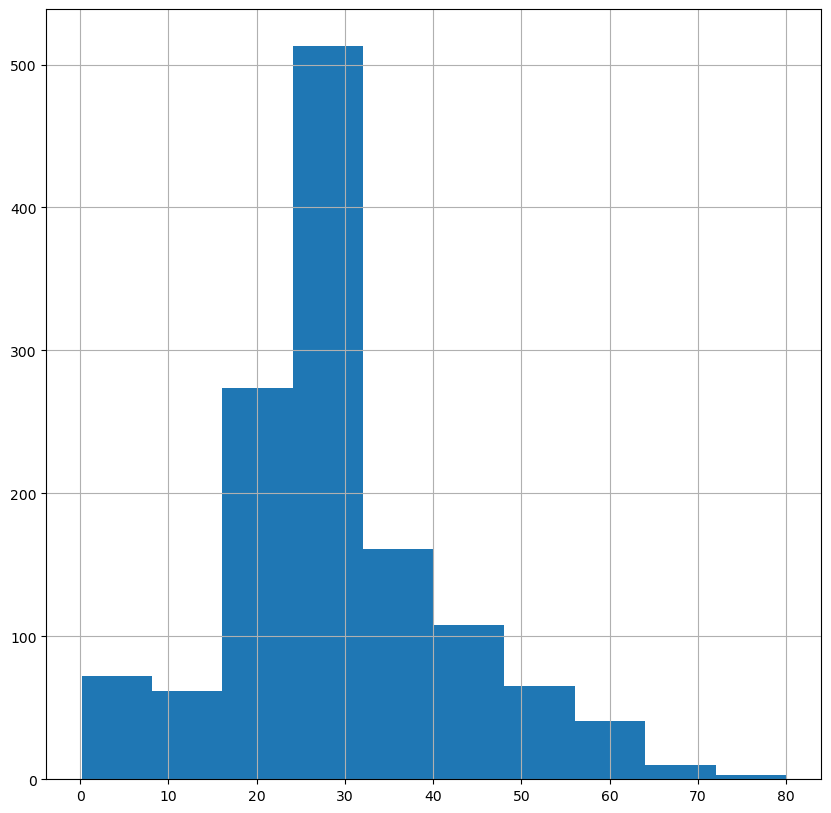

In [51]:
df_titanic['Age'].hist()

In [52]:
bins = [0,15,20,35,55,85]
labels = ['Young', 'Teenager', 'Adults-Young', 'Adults-Middle', 'Adults-Old']

df_titanic['Age_Group'] = pd.cut(df_titanic['Age'], bins=bins, labels=labels, include_lowest=True)
df_titanic.head()

Age     Fare  PassengerId Survived  Pclass  \
0  22.0   7.2500            1      0.0       3   
1  38.0  71.2833            2      1.0       1   
2  26.0   7.9250            3      1.0       3   
3  35.0  53.1000            4      1.0       1   
4  35.0   8.0500            5      0.0       3   

                                                Name     Sex  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    male      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female      1      0   
2                             Heikkinen, Miss. Laina  female      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female      1      0   
4                           Allen, Mr. William Henry    male      0      0   

             Ticket Embarked      Age_Group  
0         A/5 21171        S   Adults-Young  
1          PC 17599        C  Adults-Middle  
2  STON/O2. 3101282        S   Adults-Young  
3            113803        S   Adults-Young  
4            373450        S   Adults-Young

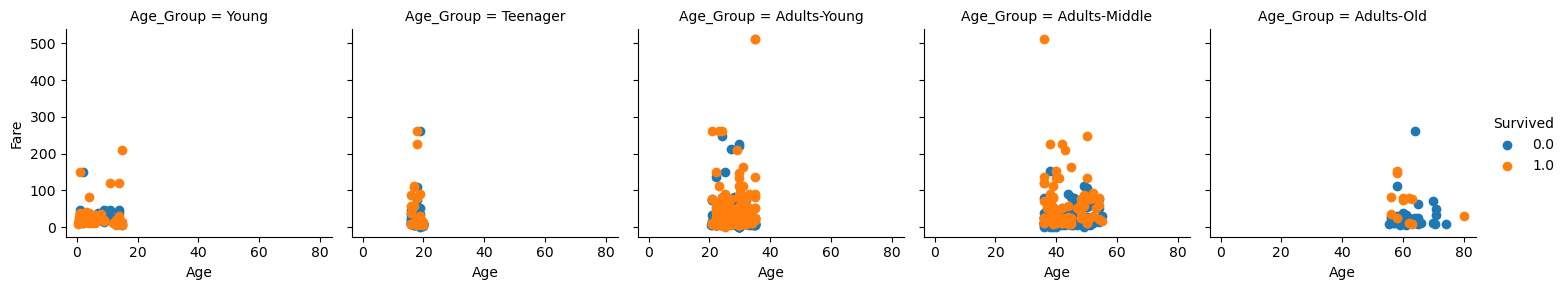

In [53]:
titanicplot = sns.FacetGrid(df_titanic, col='Age_Group', hue='Survived')
titanicplot.map(plt.scatter,'Age','Fare').add_legend()
plt.show()

In [54]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_titanic)

In [55]:
!pip install ydata-profiling

In [56]:
from ydata_profiling import ProfileReport

In [57]:
from ydata_profiling.model.summarizer import PandasProfilingSummarizer
profile = ProfileReport(df_titanic)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
df_titanic.columns

Index(['Age', 'Fare', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex',
       'SibSp', 'Parch', 'Ticket', 'Embarked', 'Age_Group'],
      dtype='object')

In [59]:
df_titanicNew = df_titanic.drop(['PassengerId','Name','Ticket'],axis=1)

In [60]:
df_titanicNew.head()

Age     Fare Survived  Pclass     Sex  SibSp  Parch Embarked  \
0  22.0   7.2500      0.0       3    male      1      0        S   
1  38.0  71.2833      1.0       1  female      1      0        C   
2  26.0   7.9250      1.0       3  female      0      0        S   
3  35.0  53.1000      1.0       1  female      1      0        S   
4  35.0   8.0500      0.0       3    male      0      0        S   

       Age_Group  
0   Adults-Young  
1  Adults-Middle  
2   Adults-Young  
3   Adults-Young  
4   Adults-Young

In [61]:
df_train = df_titanicNew.iloc[0:train.shape[0],]
df_train.shape

(891, 9)

In [62]:
df_test = df_titanicNew.iloc[train.shape[0]:,]
df_test.shape

(418, 9)

In [63]:
df_test.head()

Age     Fare Survived  Pclass     Sex  SibSp  Parch Embarked  \
891  34.5   7.8292      NaN       3    male      0      0        Q   
892  47.0   7.0000      NaN       3  female      1      0        S   
893  62.0   9.6875      NaN       2    male      0      0        Q   
894  27.0   8.6625      NaN       3    male      0      0        S   
895  22.0  12.2875      NaN       3  female      1      1        S   

         Age_Group  
891   Adults-Young  
892  Adults-Middle  
893     Adults-Old  
894   Adults-Young  
895   Adults-Young

In [64]:
df_test.drop('Survived', axis=1, inplace=True)

### Statistical test?

In [65]:
import scipy.stats as stats

In [66]:
cor_test = ['Age', 'Fare']

for i in cor_test:
    teststats, pvalue = stats.pearsonr(df_train[i], df_train['Survived'].astype(int))
    print('Pvalue is', pvalue)

Pvalue is 0.035838299871153285
Pvalue is 6.120189341922155e-15


* Both Age and Fare are important as pvalue < 0.05, hence columns are significant

### Chi-Square test

In [67]:
stats.chi2_contingency(pd.crosstab(df_train['Pclass'], df_train['Survived']))

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))

In [68]:
chi_test = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_Group']

for i in chi_test:
    teststats, pvalue, dof, expected_freq = stats.chi2_contingency(pd.crosstab(df_train[i], df_train['Survived']))
    
    print('Pvalue is', pvalue)

Pvalue is 4.549251711298793e-23
Pvalue is 1.1973570627755645e-58
Pvalue is 1.5585810465902147e-06
Pvalue is 9.703526421039997e-05
Pvalue is 2.3008626481449577e-06
Pvalue is 0.0009955378235861937


### Model Building

In [69]:
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier

In [70]:
df_train['Survived'] = df_train['Survived'].astype(int)

In [71]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

In [72]:
X.head()

Age     Fare  Pclass     Sex  SibSp  Parch Embarked      Age_Group
0  22.0   7.2500       3    male      1      0        S   Adults-Young
1  38.0  71.2833       1  female      1      0        C  Adults-Middle
2  26.0   7.9250       3  female      0      0        S   Adults-Young
3  35.0  53.1000       1  female      1      0        S   Adults-Young
4  35.0   8.0500       3    male      0      0        S   Adults-Young

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
X.dtypes

Age           float64
Fare          float64
Pclass          int64
Sex            object
SibSp           int64
Parch           int64
Embarked       object
Age_Group    category
dtype: object

In [75]:
num_data = X[['Age','Fare']]
cat_data = X[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_Group']]

### Scaling

In [76]:
ss = StandardScaler()
# we are scaling the data for ANN. Without scaling it will give very poor results. Computions become easier
num_scaled = ss.fit_transform(num_data)

num_scaled = pd.DataFrame(num_scaled, columns=num_data.columns)
num_scaled.head()

Age      Fare
0 -0.595254 -0.502445
1  0.635996  0.786845
2 -0.287441 -0.488854
3  0.405137  0.420730
4  0.405137 -0.486337

### Encoding

In [77]:
cat_dummy = pd.get_dummies(cat_data, drop_first=True)
cat_dummy.head()

Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Age_Group_Teenager  \
0       3      1      0         1           0           1                   0   
1       1      1      0         0           0           0                   0   
2       3      0      0         0           0           1                   0   
3       1      1      0         0           0           1                   0   
4       3      0      0         1           0           1                   0   

   Age_Group_Adults-Young  Age_Group_Adults-Middle  Age_Group_Adults-Old  
0                       1                        0                     0  
1                       0                        1                     0  
2                       1                        0                     0  
3                       1                        0                     0  
4                       1                        0                     0

### Concatenating Data

In [78]:
X_scaled = pd.concat([num_scaled, cat_dummy], axis=1)
X_scaled.head()

Age      Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0 -0.595254 -0.502445       3      1      0         1           0           1   
1  0.635996  0.786845       1      1      0         0           0           0   
2 -0.287441 -0.488854       3      0      0         0           0           1   
3  0.405137  0.420730       1      1      0         0           0           1   
4  0.405137 -0.486337       3      0      0         1           0           1   

   Age_Group_Teenager  Age_Group_Adults-Young  Age_Group_Adults-Middle  \
0                   0                       1                        0   
1                   0                       0                        1   
2                   0                       1                        0   
3                   0                       1                        0   
4                   0                       1                        0   

   Age_Group_Adults-Old  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

### Testing data

In [79]:
num_data_test = df_test[['Age','Fare']]
cat_data_test = df_test[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age_Group']]

In [80]:
num_data_test.shape

(418, 2)

In [81]:
num_scaled_test = ss.transform(num_data_test)
num_scaled_test = pd.DataFrame(num_scaled_test, columns=num_data_test.columns)

In [82]:
num_scaled_test.head()

Age      Fare
0  0.366660 -0.490783
1  1.328575 -0.507479
2  2.482872 -0.453367
3 -0.210488 -0.474005
4 -0.595254 -0.401017

In [83]:
cat_dummy_test = pd.get_dummies(cat_data_test, drop_first=True)
cat_dummy_test.head()

Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
891       3      0      0         1           1           0   
892       3      1      0         0           0           1   
893       2      0      0         1           1           0   
894       3      0      0         1           0           1   
895       3      1      1         0           0           1   

     Age_Group_Teenager  Age_Group_Adults-Young  Age_Group_Adults-Middle  \
891                   0                       1                        0   
892                   0                       0                        1   
893                   0                       0                        0   
894                   0                       1                        0   
895                   0                       1                        0   

     Age_Group_Adults-Old  
891                     0  
892                     0  
893                     1  
894                     0  
895                     0

In [84]:
cat_dummy_test.reset_index(drop=True, inplace=True)
cat_dummy_test.head()

Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  Age_Group_Teenager  \
0       3      0      0         1           1           0                   0   
1       3      1      0         0           0           1                   0   
2       2      0      0         1           1           0                   0   
3       3      0      0         1           0           1                   0   
4       3      1      1         0           0           1                   0   

   Age_Group_Adults-Young  Age_Group_Adults-Middle  Age_Group_Adults-Old  
0                       1                        0                     0  
1                       0                        1                     0  
2                       0                        0                     1  
3                       1                        0                     0  
4                       1                        0                     0

In [85]:
df_test_scaled = pd.concat([num_scaled_test, cat_dummy_test], axis=1)
df_test_scaled.head()

Age      Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0  0.366660 -0.490783       3      0      0         1           1           0   
1  1.328575 -0.507479       3      1      0         0           0           1   
2  2.482872 -0.453367       2      0      0         1           1           0   
3 -0.210488 -0.474005       3      0      0         1           0           1   
4 -0.595254 -0.401017       3      1      1         0           0           1   

   Age_Group_Teenager  Age_Group_Adults-Young  Age_Group_Adults-Middle  \
0                   0                       1                        0   
1                   0                       0                        1   
2                   0                       0                        0   
3                   0                       1                        0   
4                   0                       1                        0   

   Age_Group_Adults-Old  
0                     0  
1                     0  
2                     1  
3                     0  
4                     0

In [86]:
df_test_scaled.shape

(418, 12)

### Without Scaling

In [87]:
X=pd.get_dummies(X, drop_first=True)
X.head()

Age     Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0  22.0   7.2500       3      1      0         1           0           1   
1  38.0  71.2833       1      1      0         0           0           0   
2  26.0   7.9250       3      0      0         0           0           1   
3  35.0  53.1000       1      1      0         0           0           1   
4  35.0   8.0500       3      0      0         1           0           1   

   Age_Group_Teenager  Age_Group_Adults-Young  Age_Group_Adults-Middle  \
0                   0                       1                        0   
1                   0                       0                        1   
2                   0                       1                        0   
3                   0                       1                        0   
4                   0                       1                        0   

   Age_Group_Adults-Old  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [88]:
X.shape

(891, 12)

In [89]:
df_test = pd.get_dummies(df_test, drop_first=True)
df_test.shape

(418, 12)

In [90]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

### Logistic Regression

In [91]:
lgr = LogisticRegression()

In [92]:
y_pred = []
for train_index, test_index in kfold.split(X,y):
    x_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    lgr.fit(x_train, y_train)
    y_pred.append(lgr.predict(df_test))

In [93]:
y_pred

[array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 

In [94]:
pd.DataFrame(y_pred).T

0  1  2  3  4
0    0  0  0  0  0
1    0  0  0  0  0
2    0  0  0  0  0
3    0  0  0  0  0
4    1  1  1  1  1
..  .. .. .. .. ..
413  0  0  0  0  0
414  1  1  1  1  1
415  0  0  0  0  0
416  0  0  0  0  0
417  0  0  0  0  0

[418 rows x 5 columns]

In [95]:
y_log = pd.DataFrame(y_pred).T.mode(axis=1)
y_log

0
0    0
1    0
2    0
3    0
4    1
..  ..
413  0
414  1
415  0
416  0
417  0

[418 rows x 1 columns]

### Basic model

In [96]:
model_prediction = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':test.Sex})
model_prediction

PassengerId Survived
0            892     male
1            893   female
2            894     male
3            895     male
4            896   female
..           ...      ...
413         1305     male
414         1306   female
415         1307     male
416         1308     male
417         1309     male

[418 rows x 2 columns]

In [97]:
model_prediction['Survived'] = y_log

In [100]:
model_prediction.to_csv("Basic.csv", index=False)

In [101]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
DT = DecisionTreeClassifier()

In [103]:
y_pred = []
for train_index, test_index in kfold.split(X,y):
    x_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    DT.fit(x_train, y_train)
    y_pred.append(lgr.predict(df_test))

In [104]:
y_pred

[array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [105]:
y_log = pd.DataFrame(y_pred).T.mode(axis=1)

In [106]:
model_prediction = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':test.Sex})
model_prediction['Survived']=y_log

In [107]:
model_prediction.to_csv('Decision_Tree.csv', index=False)

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
RF = RandomForestClassifier()

In [125]:
y_pred = []
for train_index, test_index in kfold.split(X,y):
    x_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    RF.fit(x_train, y_train)
    y_pred.append(RF.predict(df_test))

In [126]:
y_log = pd.DataFrame(y_pred).T.mode(axis=1)

In [127]:
model_prediction = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':test.Sex})
model_prediction['Survived']=y_log

In [128]:
model_prediction.to_csv('Random_Forest.csv', index=False)

In [116]:
from sklearn.ensemble import AdaBoostClassifier

In [121]:
Aboost = AdaBoostClassifier()
y_pred = []
for train_index, test_index in kfold.split(X,y):
    x_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    Aboost.fit(x_train, y_train)
    y_pred.append(Aboost.predict(df_test))

In [122]:
y_log = pd.DataFrame(y_pred).T.mode(axis=1)

In [123]:
model_prediction = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':test.Sex})
model_prediction['Survived']=y_log

In [124]:
model_prediction.to_csv('Adaboost.csv', index=False)

In [129]:
import xgboost

In [135]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
y_pred = []
for train_index, test_index in kfold.split(X,y):
    x_train = X.loc[train_index]
    y_train = y.loc[train_index]
    
    xgb.fit(x_train, y_train)
    y_pred.append(xgb.predict(df_test))

In [136]:
y_log = pd.DataFrame(y_pred).T.mode(axis=1)

In [137]:
model_prediction = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':test.Sex})
model_prediction['Survived']=y_log

In [138]:
model_prediction.to_csv('xgboost.csv', index=False)

# Neural Networks

In [139]:
X_scaled.head()

Age      Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0 -0.595254 -0.502445       3      1      0         1           0           1   
1  0.635996  0.786845       1      1      0         0           0           0   
2 -0.287441 -0.488854       3      0      0         0           0           1   
3  0.405137  0.420730       1      1      0         0           0           1   
4  0.405137 -0.486337       3      0      0         1           0           1   

   Age_Group_Teenager  Age_Group_Adults-Young  Age_Group_Adults-Middle  \
0                   0                       1                        0   
1                   0                       0                        1   
2                   0                       1                        0   
3                   0                       1                        0   
4                   0                       1                        0   

   Age_Group_Adults-Old  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [140]:
df_test_scaled.head()

Age      Fare  Pclass  SibSp  Parch  Sex_male  Embarked_Q  Embarked_S  \
0  0.366660 -0.490783       3      0      0         1           1           0   
1  1.328575 -0.507479       3      1      0         0           0           1   
2  2.482872 -0.453367       2      0      0         1           1           0   
3 -0.210488 -0.474005       3      0      0         1           0           1   
4 -0.595254 -0.401017       3      1      1         0           0           1   

   Age_Group_Teenager  Age_Group_Adults-Young  Age_Group_Adults-Middle  \
0                   0                       1                        0   
1                   0                       0                        1   
2                   0                       0                        0   
3                   0                       1                        0   
4                   0                       1                        0   

   Age_Group_Adults-Old  
0                     0  
1                     0  
2                     1  
3                     0  
4                     0

In [146]:
ANN = MLPClassifier()
y_pred=[]
for train_index, test_index in kfold.split(X_scaled,y):
    x_train = X_scaled.loc[train_index]
    y_train = y.loc[train_index]
    
    ANN.fit(x_train, y_train)
    y_pred.append(ANN.predict(df_test_scaled))

In [147]:
y_log = pd.DataFrame(y_pred).T.mode(axis=1)

In [1]:
y_log

NameError: name 'y_log' is not defined

In [148]:
model_prediction = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':test.Sex})
model_prediction['Survived']=y_log

In [149]:
model_prediction.to_csv('ANN.csv', index=False)